# Hypothesis 1: 
### Counties in WA State with higher average population density tend to exhibit higher electric vehicle adoption rates.

In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import county as cty
import population as pop

In [42]:
filename = "/Users/peeyu/PycharmProjects/2024Spr_projects/datasets/ev_by_county.csv"
df_ev_by_county = cty.calc_proportion(cty.clean_data(cty.read_data(filename)))

In [43]:
population_filename = "/Users/peeyu/PycharmProjects/2024Spr_projects/datasets/population_data.csv"
population_data = pop.read_population_data(population_filename)
df_population = pop.calculate_average_population_density(population_data)
df_population

,County,Avg_Total_Population_Density
0,Adams,10.223478
1,Asotin,35.568261
2,Benton,109.590870
3,Chelan,26.221304
4,Clallam,42.931304
5,Clark,723.238696
6,Columbia,4.900000
7,Cowlitz,94.194348
8,Douglas,22.085652
9,Ferry,3.553043


In [44]:
merged_df = pd.merge(df_ev_by_county, df_population, on='County', how='inner')

In [45]:
merged_df

,Year,County,State,Electric Vehicle (EV) Total,Non-Electric Vehicle Total,Total Vehicles,Proportion,Avg_Total_Population_Density
0,2022,Wahkiakum,WA,0,1815,1815,0.000000,16.029565
1,2017,Adams,WA,0,5079,5079,0.000000,10.223478
2,2024,Franklin,WA,10,20616,20626,0.000485,65.573043
3,2018,Grays Harbor,WA,0,20109,20109,0.000000,39.675652
4,2018,Cowlitz,WA,129,71728,71857,0.001795,94.194348
...,...,...,...,...,...,...,...,...
6781,2017,Benton,WA,0,40165,40165,0.000000,109.590870
6782,2017,Jefferson,WA,179,24009,24188,0.007400,17.359130
6783,2022,Jefferson,WA,661,24528,25189,0.026242,17.359130
6784,2023,Adams,WA,32,13009,13041,0.002454,10.223478


In [46]:
del merged_df["State"]
del merged_df["Year"]

In [47]:
grouped_df = merged_df.groupby('County').mean().reset_index()

In [48]:
grouped_df

,County,Electric Vehicle (EV) Total,Non-Electric Vehicle Total,Total Vehicles,Proportion,Avg_Total_Population_Density
0,Adams,10.258621,9027.500000,9037.758621,0.000822,10.223478
1,Asotin,16.011494,9582.775862,9598.787356,0.001280,35.568261
2,Benton,442.965517,87990.333333,88433.298851,0.003305,109.590870
3,Chelan,205.551724,38210.022989,38415.574713,0.003838,26.221304
4,Clallam,241.034483,35664.195402,35905.229885,0.004860,42.931304
5,Clark,2077.574713,197023.488506,199101.063218,0.006593,723.238696
6,Columbia,3.206897,1983.091954,1986.298851,0.001316,4.900000
7,Cowlitz,175.948276,49899.735632,50075.683908,0.002491,94.194348
8,Douglas,73.603448,20209.729885,20283.333333,0.002615,22.085652
9,Ferry,6.408046,3968.465517,3974.873563,0.001467,3.553043


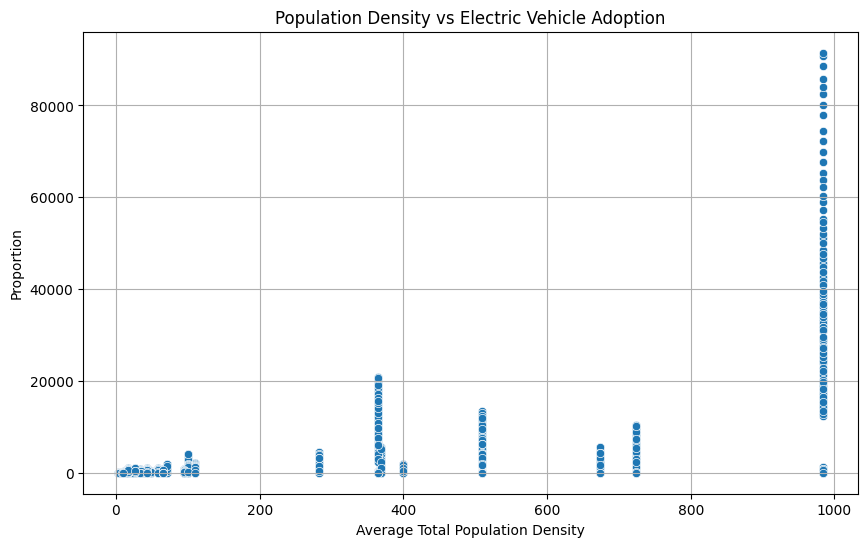

In [53]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_df, x='Avg_Total_Population_Density', y='Electric Vehicle (EV) Total')
plt.title('Population Density vs Electric Vehicle Adoption')
plt.xlabel('Average Total Population Density')
plt.ylabel('Proportion')
plt.grid(True)
plt.show()

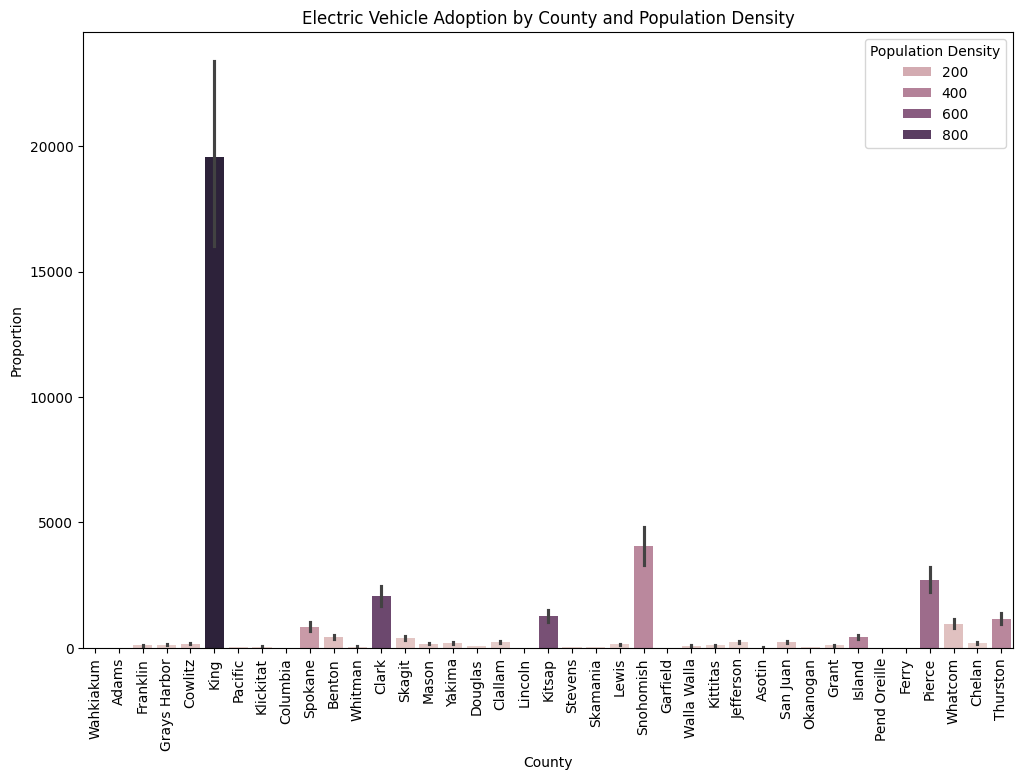

In [54]:
plt.figure(figsize=(12, 8))
sns.barplot(data=merged_df, x='County', y='Electric Vehicle (EV) Total', hue='Avg_Total_Population_Density')
plt.title('Electric Vehicle Adoption by County and Population Density')
plt.xlabel('County')
plt.ylabel('Proportion')
plt.xticks(rotation=90)
plt.legend(title='Population Density')
plt.show()

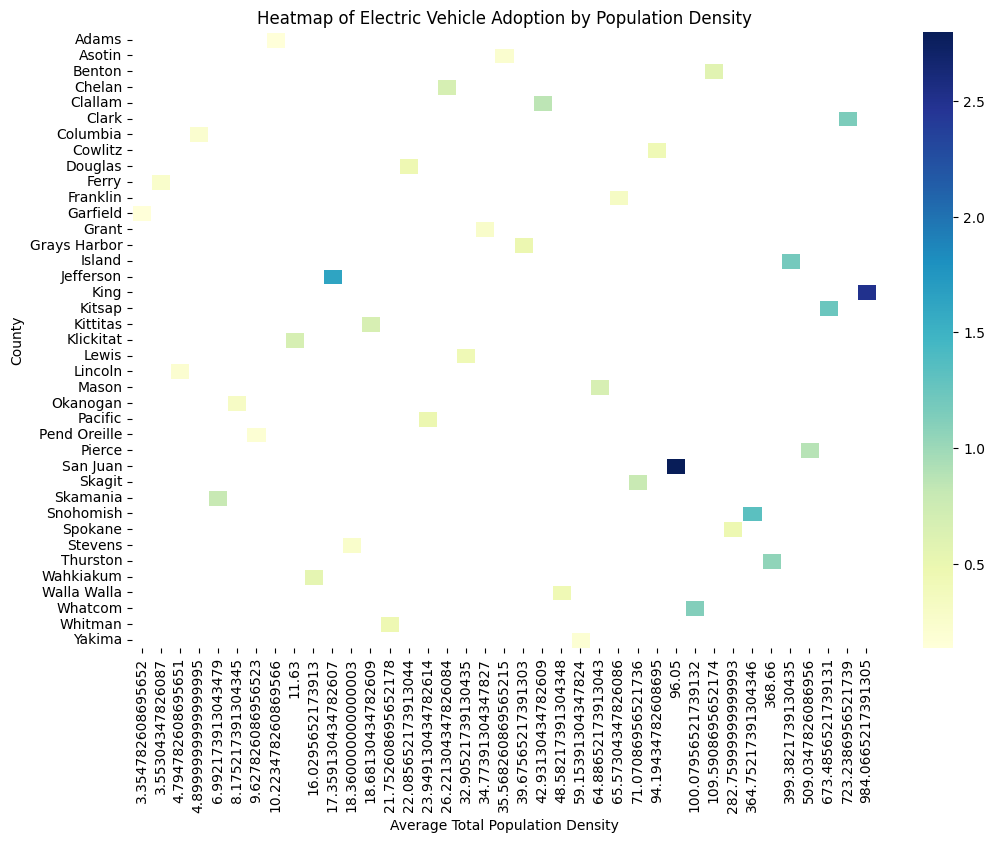

In [55]:
heatmap_data = merged_df.pivot_table(index='County', columns='Avg_Total_Population_Density', values='Proportion', aggfunc='sum')
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='YlGnBu', linewidths=0.5)
plt.title('Heatmap of Electric Vehicle Adoption by Population Density')
plt.xlabel('Average Total Population Density')
plt.ylabel('County')
plt.show()

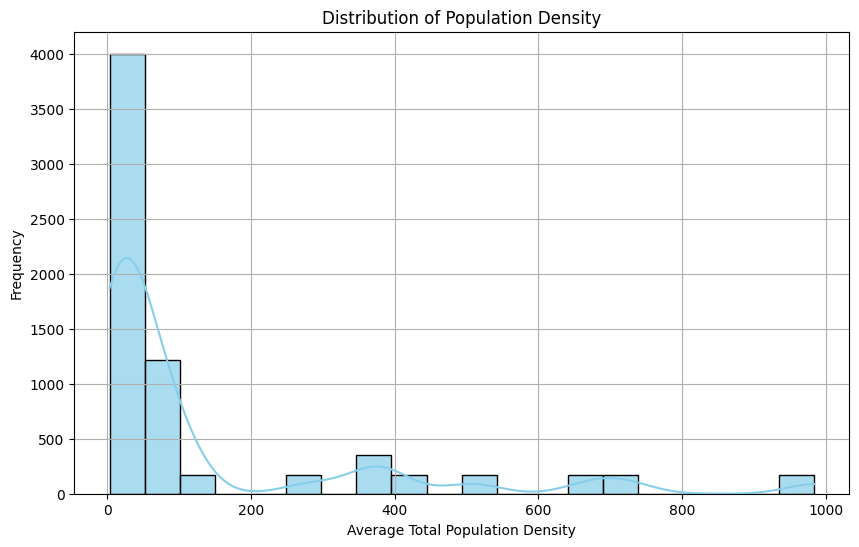

In [56]:
plt.figure(figsize=(10, 6))
sns.histplot(data=merged_df, x='Avg_Total_Population_Density', bins=20, kde=True, color='skyblue', alpha=0.7)
plt.title('Distribution of Population Density')
plt.xlabel('Average Total Population Density')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

**Conclusion:**

1. There is a strong positive correlation between population density and electric vehicle adoption rates across the counties. Counties with higher population densities tend to have a higher proportion of electric vehicles.

2. The county with the highest electric vehicle adoption rate by a significant margin is King County, which likely corresponds to the Seattle metropolitan area. This county has a population density in the 600-800 range.

3. The heatmap shows that King and Jefferson counties have the highest levels of electric vehicle adoption relative to their population densities, indicated by the dark blue shading.

4. Most counties in Washington state have relatively low population densities, with the majority clustered around the 0-200 range, as shown in the distribution plot. These low-density counties tend to have lower electric vehicle adoption rates.

5. There are a few counties with moderate population densities in the 400-600 range, which exhibit higher electric vehicle adoption rates than the low-density counties but still lower than the high-density counties like King.

**In summary, the data suggests that electric vehicle adoption is strongly correlated with population density in Washington state, with urban and suburban areas like King County leading the way, while rural, low-density counties lag behind in electric vehicle adoption.**

*Given these points, it's reasonable to accept the hypothesis. The data shows a clear trend where counties with higher population densities tend to have higher proportion of electric vehicle adoption rates, supporting the idea of a positive correlation between population density and electric vehicle adoption in Washington state.*